In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('ex1data1.txt', header = None )
dataset.columns = ['Population', 'Profit']
dataset.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [0]:
data=np.asarray(dataset)
X=data[:,0:1]
Y=data[:,1:]
m,n = X.shape
one = np.ones(len(X))
one = [one]
one = np.asarray(one)
X_bias = np.concatenate((one.T,X),axis=1)

In [0]:
def gradientDescent(X_bias,Y,Theta,iterations,alpha,m):
    for i in range(iterations):
        hypothesis = X_bias.dot(Theta.transpose())
        t0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,0:1])).sum(axis=0)
        t1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,-1:])).sum(axis=0)
        Theta[0,0] = t0
        Theta[0,1] = t1
    
    return Theta

In [6]:
alpha = 0.02
iterations = 2000
Theta = np.zeros([1,X_bias.shape[1]])
Theta = gradientDescent(X_bias,Y,Theta,iterations,alpha,m)
print('The parameters b0 and b1 are : ')
print(Theta)
Profit_pred = X_bias.dot(Theta.transpose())

The parameters b0 and b1 are : 
[[-3.8928815   1.19274237]]


In [14]:
# predict the profit for city with 10 and 15 population
X_test = np.array([[1, 10],[1, 15]])
result = X_test.dot(Theta.transpose())
print ('Profit from 10 population city is ', result[0,0] )
print ('Profit from 15 population city is ',result[1,0] )

Profit from 10 population city is  8.03454220188622
Profit from 15 population city is  13.998254052269996


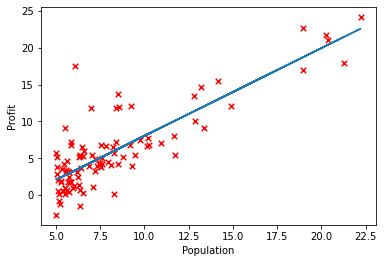

In [15]:
plt.scatter(X.transpose(),Y.transpose(),30,color="red",marker="x")
X_axis = X
Y_axis = X_bias.dot(Theta.transpose())
plt.plot(X_axis,Y_axis)
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()